In [1]:
import numpy as np

import msprime

import sys
sys.path.append('../src/')
import util


In [2]:
ts = msprime.sim_mutations(
    msprime.sim_ancestry(
        5,
        sequence_length=100,
        random_seed=1234
    ),
    rate=1e-2,
    random_seed=1234
)


In [3]:
# Examples of three different types of paths.
individual_name = "Triploid test"
path_1 = util.SamplePath(
    individual=individual_name,
    nodes=np.array([2, 2, 2, 2, 2, 2]),  # No switch
    site_positions=ts.sites_position
)
path_2 = util.SamplePath(
    individual=individual_name,
    nodes=np.array([2, 2, 0, 0, 0, 0]),  # One switch
    site_positions=ts.sites_position
)
path_3 = util.SamplePath(
    individual=individual_name,
    nodes=np.array([2, 2, 0, 0, 1, 1]),  # Two switches
    site_positions=ts.sites_position
)

ind_id, new_ts = util.add_individual_to_tree_sequence(
    ts,
    paths=[path_1, path_2, path_3]
)


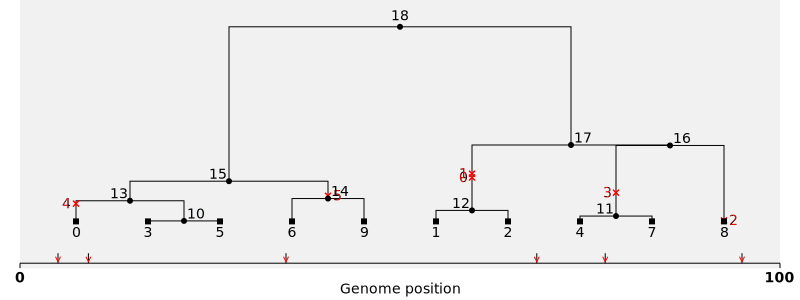

In [4]:
from IPython import display
display.display(ts.draw_svg(size=(800, 300)))


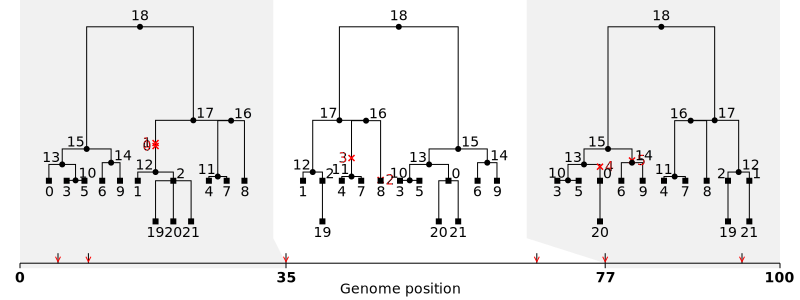

In [5]:
display.display(new_ts.draw_svg(size=(800, 300)))


In [6]:
new_ts.tables.mutations


id,site,node,time,derived_state,parent,metadata
0,0,12,0.85429667,A,-1,
1,1,12,0.92826372,A,-1,
2,2,8,0.01907886,T,-1,
3,3,11,0.55888925,T,-1,
4,4,0,0.34570619,T,-1,
5,5,14,0.49844347,A,-1,


In [7]:
new_ts.tables.sites


id,position,ancestral_state,metadata
0,5,T,
1,9,T,
2,35,C,
3,68,G,
4,77,A,
5,95,C,


In [8]:
with open("test.vcf", "w") as f:
    new_ts.write_vcf(
        f,
        contig_id="20",
        individuals=np.arange(
            ts.num_individuals,
            new_ts.num_individuals
        ),
        individual_names=["triploid_test"]
    )


In [9]:
# The above gives this
###fileformat=VCFv4.2
###source=tskit 0.5.5
###FILTER=<ID=PASS,Description="All filters passed">
###contig=<ID=20,length=100>
###FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM  POS     ID      REF     ALT     QUAL    FILTER  INFO    FORMAT  triploid_test
#20      5       0       T       A       .       PASS    .       GT      1|1|1
#20      9       1       T       A       .       PASS    .       GT      1|1|1
#20      35      2       C       T       .       PASS    .       GT      0|0|0
#20      68      3       G       T       .       PASS    .       GT      0|0|0
#20      77      4       A       T       .       PASS    .       GT      0|1|0
#20      95      5       C       A       .       PASS    .       GT      0|0|0
